In [49]:
import pandas as pd

In [50]:
# Load the Excel file
file_path = "Data/Jan2014.xls"

In [51]:
# Load the file, specifying `engine="openpyxl"` for modern .xlsx files or `engine="xlrd"` for older .xls files
df = pd.read_excel(file_path, engine="xlrd")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Jan2014.xls'

In [ ]:
len(df)

354

In [ ]:
# Rename the required columns
column_mapping = {
    "Ετος": "Year",
    "Μήνας": "Month",
    "Αρ.Παροχής": "Supply Number",
    "Σύνολο KWh": "Total KWh",
    "Αξία Ενέργειας": "Energy Cost",
    "Πληρωτέο Ποσό": "Payable Amount",
    "Τύπος Λογαριασμού": "Bill Type"
}

df.rename(columns=column_mapping, inplace=True)

# Translate values in 'Bill Type' column
df["Bill Type"] = df["Bill Type"].replace({
    "ΕΝΑΝΤ": "Estimated",
    "ΕΚΚΑΘ": "Final"
})


data_df = df[["Year", "Month", "Supply Number", "Total KWh", "Energy Cost", "Payable Amount", "Bill Type"]]

In [ ]:
data_df.head()

,Year,Month,Supply Number,Total KWh,Energy Cost,Payable Amount,Bill Type
0,2014,1,2180682001,0,182.30,206.00,Estimated
1,2014,1,2181639301,8012,1221.20,987.59,Final
2,2014,1,2181995201,17907,2693.53,2861.57,Final
3,2014,1,2181995301,12993,1961.48,1517.90,Final
4,2014,1,2182078301,11006,1663.46,1676.89,Final


In [ ]:
len(data_df)

354

In [ ]:
data_df['Supply Number'] = data_df['Supply Number'] // 100

C:\Users\nikop\AppData\Local\Temp\ipykernel_7188\3056612128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Supply Number'] = data_df['Supply Number'] // 100


In [ ]:
data_df.head()

,Year,Month,Supply Number,Total KWh,Energy Cost,Payable Amount,Bill Type
0,2014,1,21806820,0,182.30,206.00,Estimated
1,2014,1,21816393,8012,1221.20,987.59,Final
2,2014,1,21819952,17907,2693.53,2861.57,Final
3,2014,1,21819953,12993,1961.48,1517.90,Final
4,2014,1,21820783,11006,1663.46,1676.89,Final


In [ ]:
# Load labels
labels_df = pd.read_csv('labels_pylaias_xortiati.csv')

In [ ]:
labels_df

,Supply Number,Label
0,20142856,School/Nursery
1,20170967,School/Nursery
2,20199113,Parks & Cultural Sites
3,20213044,School/Nursery
4,20213600,School/Nursery
...,...,...
61,21939383,School/Nursery
62,20215071,School/Nursery
63,21927245,School/Nursery
64,92400110,School/Nursery


In [ ]:
len(labels_df)

66

In [ ]:
# Merge the dataframes on 'Supply Number' (keeping only common rows)
merged_df = pd.merge(data_df, labels_df, on="Supply Number", how="inner")

In [ ]:
merged_df.head()

,Year,Month,Supply Number,Total KWh,Energy Cost,Payable Amount,Bill Type,Label
0,2014,1,21816393,8012,1221.20,987.59,Final,Parks & Cultural Sites
1,2014,1,21820783,11006,1663.46,1676.89,Final,Parks & Cultural Sites
2,2014,1,21691108,500,169.56,207.61,Final,Sports Facility
3,2014,1,21692465,3163,483.92,645.02,Final,School/Nursery
4,2014,1,21744101,4525,685.34,914.86,Final,School/Nursery


In [ ]:
len(merged_df)

38

In [ ]:
# import pandas as pd

# # Load the Excel file
# file_path = "Data/Jan2014.xls"

# # Load the file, specifying `engine="openpyxl"` for modern .xlsx files or `engine="xlrd"` for older .xls files
# df = pd.read_excel(file_path, engine="xlrd")

# # Rename the required columns
# column_mapping = {
#     "Ετος": "Year",
#     "Μήνας": "Month",
#     "Αρ.Παροχής": "Supply Number",
#     "Σύνολο KWh": "Total KWh",
#     "Αξία Ενέργειας": "Energy Cost",
#     "Πληρωτέο Ποσό": "Payable Amount",
#     "Τύπος Λογαριασμού": "Bill Type"
# }

# df.rename(columns=column_mapping, inplace=True)

# # Translate values in 'Bill Type' column
# df["Bill Type"] = df["Bill Type"].replace({
#     "ΕΝΑΝΤ": "Estimated",
#     "ΕΚΚΑΘ": "Final"
# })


# data_df = df[["Year", "Month", "Supply Number", "Total KWh", "Energy Cost", "Payable Amount", "Bill Type"]]

# data_df['Supply Number'] = data_df['Supply Number'] // 100

# # Load labels
# labels_df = pd.read_csv('labels_pylaias_xortiati.csv')

# # Merge the dataframes on 'Supply Number' (keeping only common rows)
# merged_df = pd.merge(data_df, labels_df, on="Supply Number", how="inner")

In [1]:
import pandas as pd
import os
import glob

# Folder containing the Excel files
data_folder = "Data"

# # Find all Excel files in the folder
# file_paths = glob.glob(os.path.join(data_folder, "*.xls"))  # Adjust to "*.xlsx" if needed

# Find all Excel files (.xls and .xlsx) in all subdirectories
file_paths = glob.glob(os.path.join(data_folder, "**", "*.xls"), recursive=True) + \
             glob.glob(os.path.join(data_folder, "**", "*.xlsx"), recursive=True)

# Initialize an empty list to store DataFrames
all_dataframes = []

# Modify 'Supply Number' based on its length
def transform_supply_number(x):
    str_x = str(x)  # Convert to string for length check
    if len(str_x) == 10:
        return x // 100  # Drop last two digits
    elif len(str_x) == 11:
        return int(str_x[1:-2])  # Drop first and last two digits
    return x  # Keep unchanged for other lengths

# Define column mappings
column_mapping = {
    "Ετος": "Year",
    "Μήνας": "Month",
    "Αρ.Παροχής": "Supply Number",
    "Σύνολο KWh": "Total KWh",
    "Κατανάλωση Kwh": "Total KWh",
    "Αξία Ενέργειας": "Energy Cost",
    "Πληρωτέο Ποσό": "Payable Amount",
    "Συν. Λογ/σμου": "Payable Amount",
    "Τύπος Λογαριασμού": "Bill Type",
    "Τύπος Λογ/σμου": "Bill Type"
}

# Process each file
for file_path in file_paths:
    # Load the Excel file
    df = pd.read_excel(file_path, engine="xlrd")  # Use "openpyxl" for .xlsx files

    # Rename columns
    df.rename(columns=column_mapping, inplace=True)

    # Translate values in 'Bill Type' column
    df["Bill Type"] = df["Bill Type"].replace({
        "ΕΝΑΝΤ": "Estimated",
        " ΕΝΑΝΤ ": "Estimated",
        " ΕΚΚΑΘ ": "Final",
        " ΕΚΤΑΚ ": "Final",
        "       ": "Estimated",
        "ΕΚΚΑΘ": "Final"
    })

    # Keep only the required columns
    df = df[["Year", "Month", "Supply Number", "Total KWh", "Energy Cost", "Payable Amount", "Bill Type"]]

    # Modify 'Supply Number' only if it has 10 digits
    df['Supply Number'] = df['Supply Number'].apply(transform_supply_number)

    # Append processed DataFrame to the list
    all_dataframes.append(df)

# Concatenate all processed DataFrames into one
unified_df = pd.concat(all_dataframes, ignore_index=True)

# Load labels
labels_df = pd.read_csv('labels_pylaias_xortiati.csv')

# Merge the dataframes on 'Supply Number' (keeping only common rows)
merged_df = pd.merge(unified_df, labels_df, on="Supply Number", how="inner")

# Save the final result to CSV
merged_df.to_csv("all_data.csv", index=False)

print("Processing complete. Merged data saved as 'all_data.csv'.")

Processing complete. Merged data saved as 'all_data.csv'.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

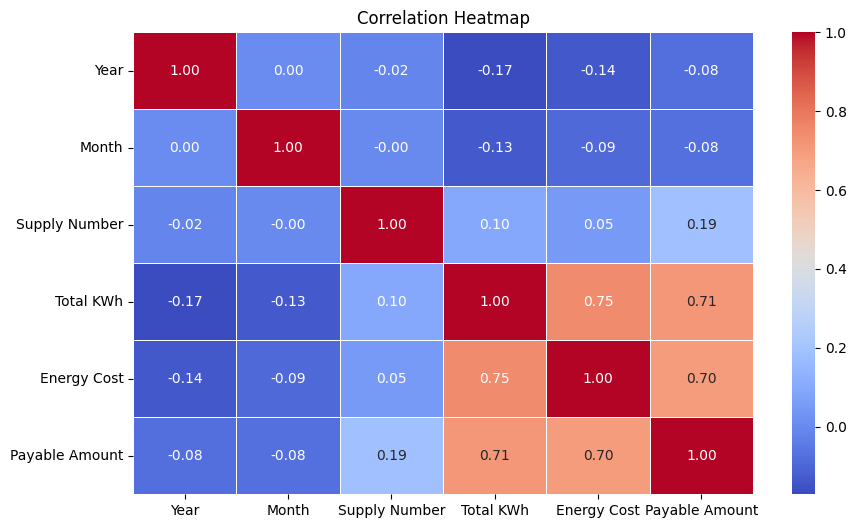

In [10]:
# Load the dataset
file_path = "all_data_clean.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert Year and Month to datetime
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(day=1))

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

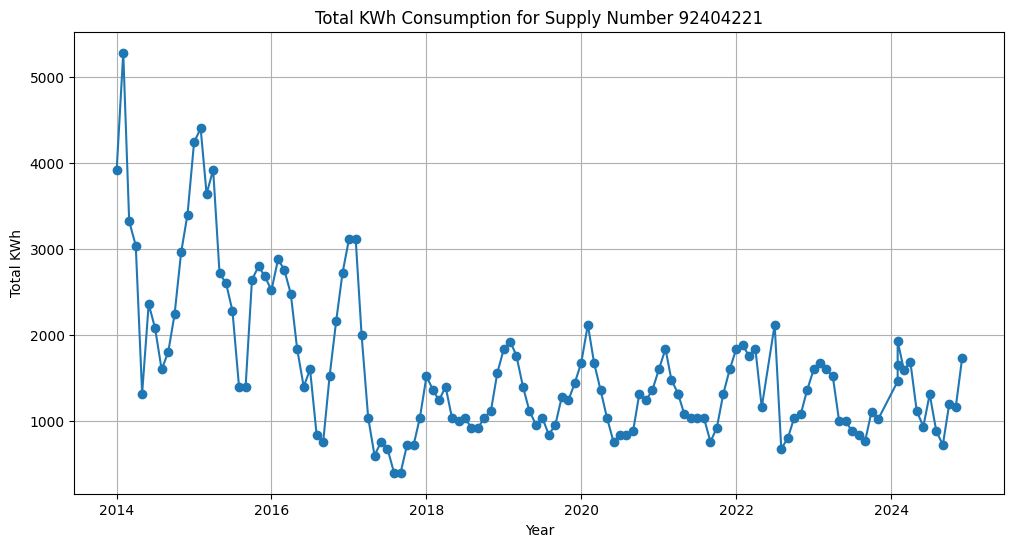

In [11]:
# Time series plot for a specific Supply Number (most frequent)
specific_supply_number = df["Supply Number"].value_counts().index[0]
df_specific = df[df["Supply Number"] == specific_supply_number].sort_values(["Year", "Month"])

plt.figure(figsize=(12, 6))
plt.plot(df_specific["Date"], df_specific["Total KWh"], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total KWh")
plt.title(f"Total KWh Consumption for Supply Number {specific_supply_number}")
plt.grid(True)
plt.show()

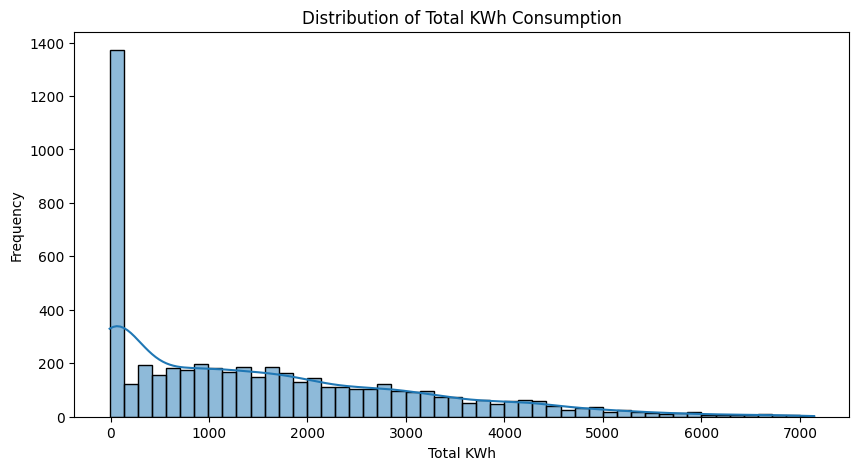

In [12]:
# Distribution of Total KWh
plt.figure(figsize=(10, 5))
sns.histplot(df["Total KWh"], bins=50, kde=True)
plt.xlabel("Total KWh")
plt.ylabel("Frequency")
plt.title("Distribution of Total KWh Consumption")
plt.show()

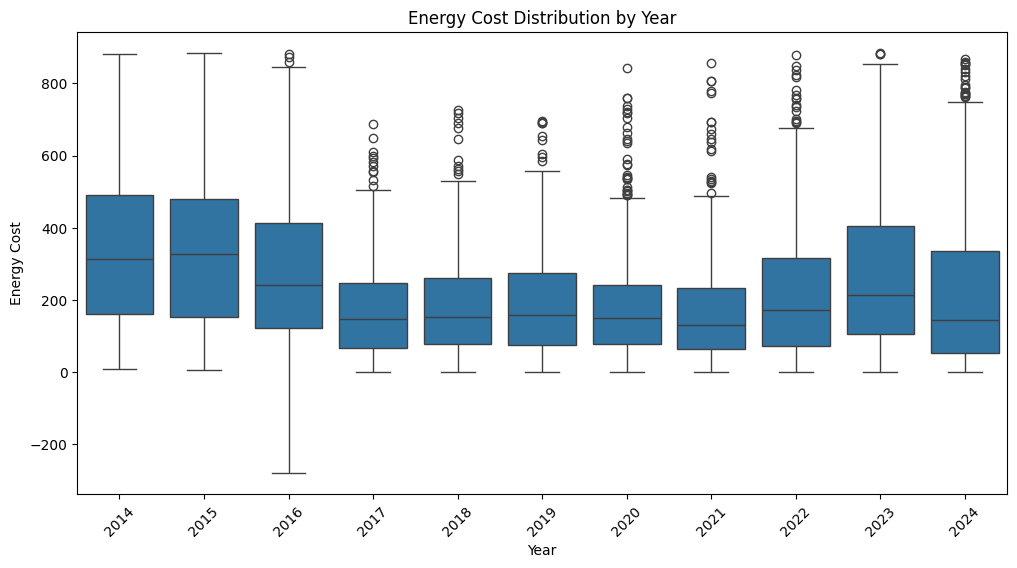

In [13]:
# Boxplot of Energy Cost by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="Energy Cost", data=df)
plt.xlabel("Year")
plt.ylabel("Energy Cost")
plt.title("Energy Cost Distribution by Year")
plt.xticks(rotation=45)
plt.show()

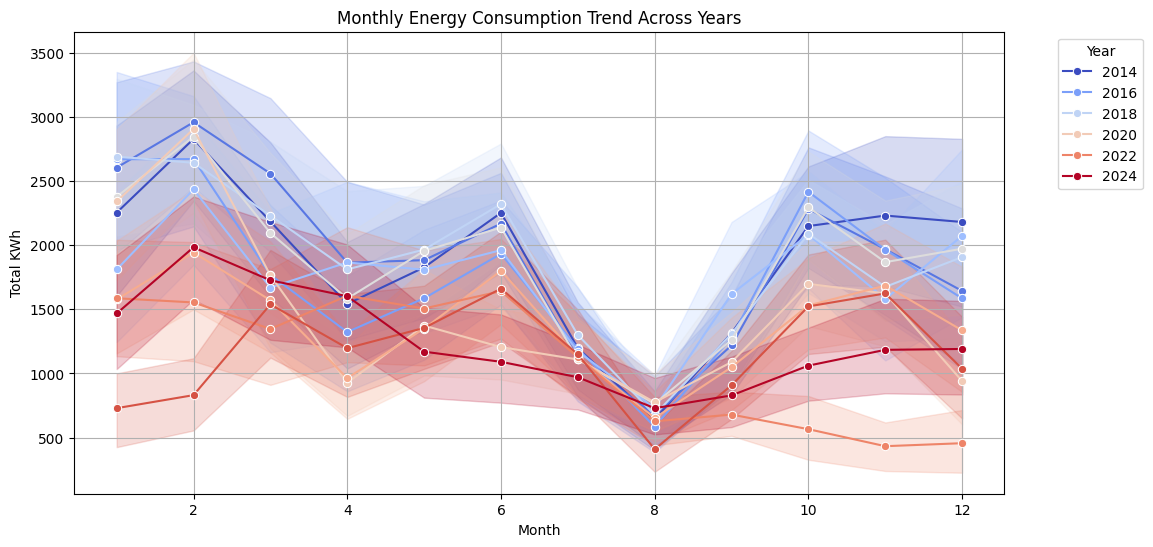

In [14]:
# Monthly Energy Consumption Trend Across Years
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Total KWh", hue="Year", data=df, marker="o", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Total KWh")
plt.title("Monthly Energy Consumption Trend Across Years")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

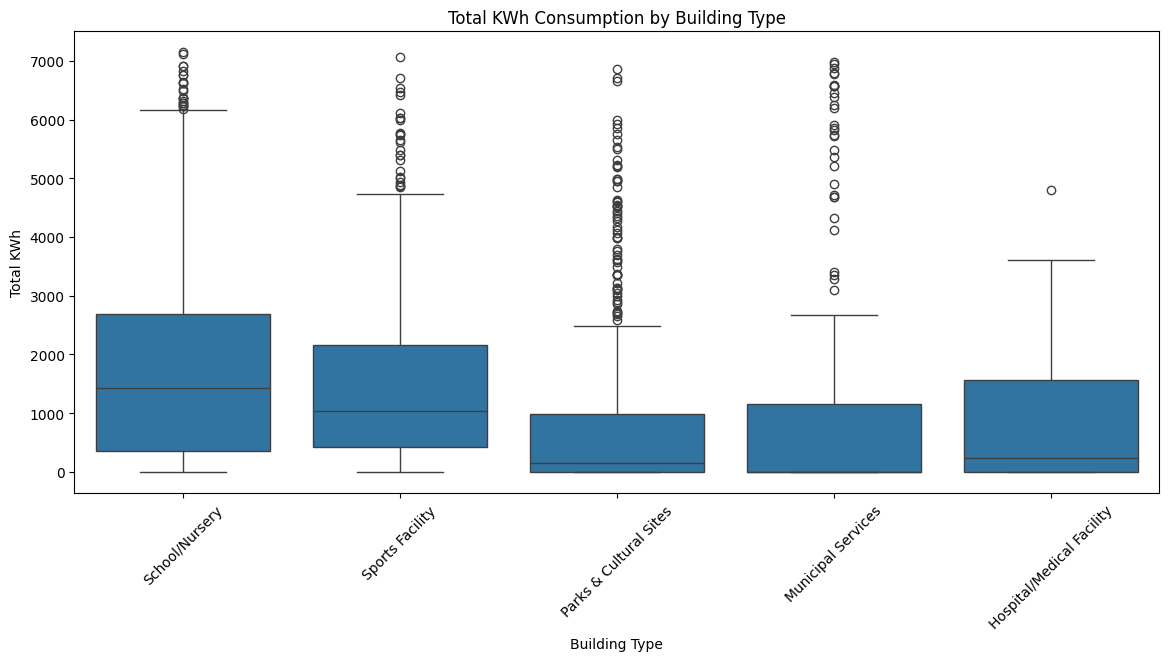

In [15]:
# Total KWh Consumption by Building Type (Label)
plt.figure(figsize=(14, 6))
sns.boxplot(x="Label", y="Total KWh", data=df)
plt.xlabel("Building Type")
plt.ylabel("Total KWh")
plt.title("Total KWh Consumption by Building Type")
plt.xticks(rotation=45)
plt.show()

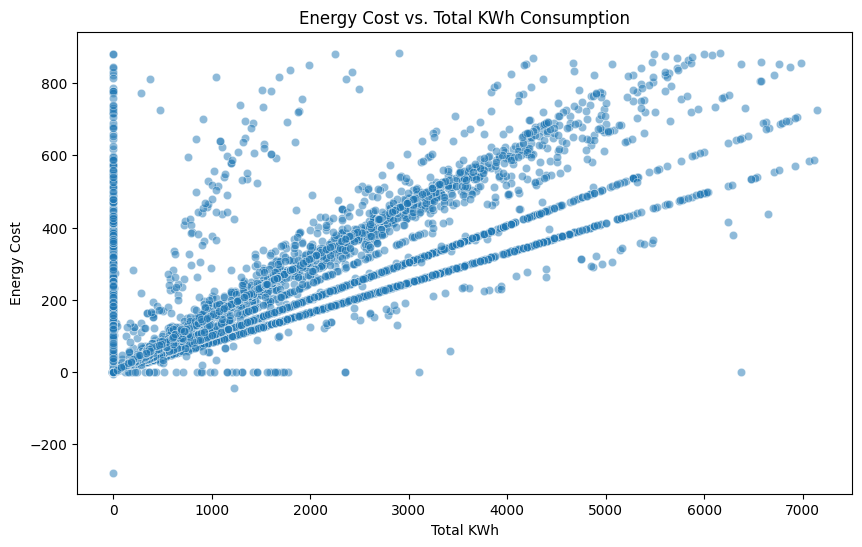

In [16]:
# Energy Cost vs. Total KWh Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Total KWh"], y=df["Energy Cost"], alpha=0.5)
plt.xlabel("Total KWh")
plt.ylabel("Energy Cost")
plt.title("Energy Cost vs. Total KWh Consumption")
plt.show()

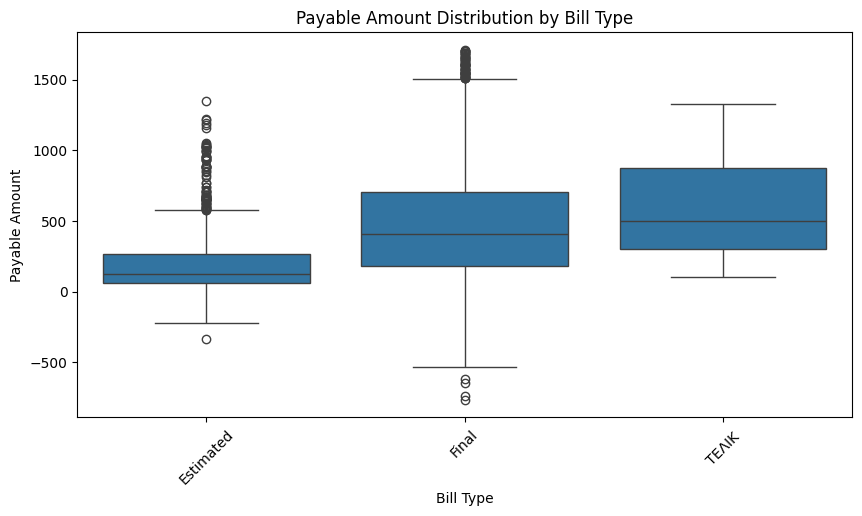

In [17]:
# Payable Amount Distribution by Bill Type
plt.figure(figsize=(10, 5))
sns.boxplot(x="Bill Type", y="Payable Amount", data=df)
plt.xlabel("Bill Type")
plt.ylabel("Payable Amount")
plt.title("Payable Amount Distribution by Bill Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset with weather data
file_path_weather = "all_data_with_weather_cleaned.csv"  # Replace with your actual file path
df_weather = pd.read_csv(file_path_weather)

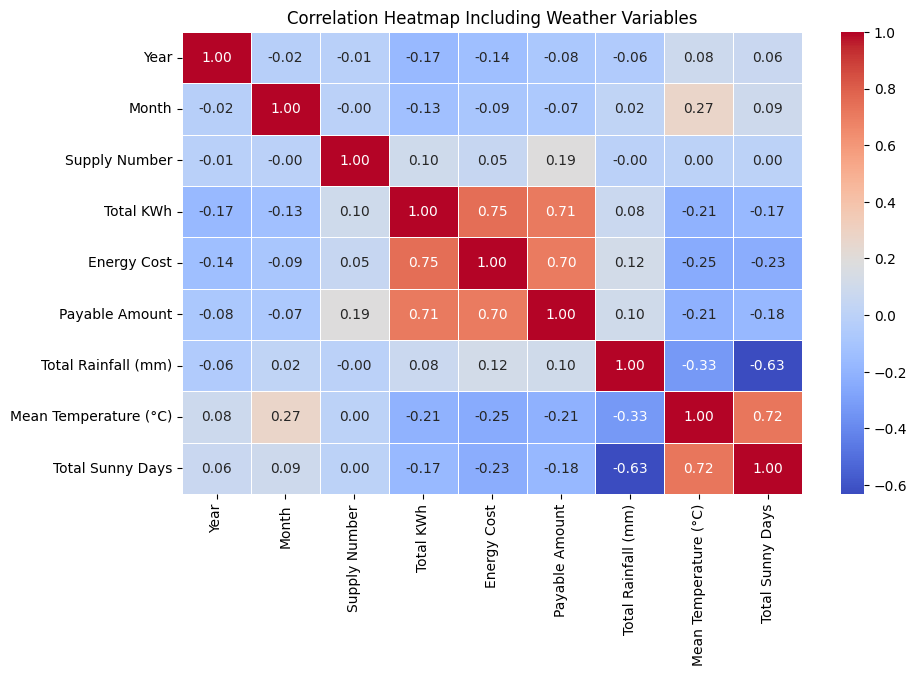

In [19]:
# Correlation Heatmap Including Weather Variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_weather.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Including Weather Variables")
plt.show()

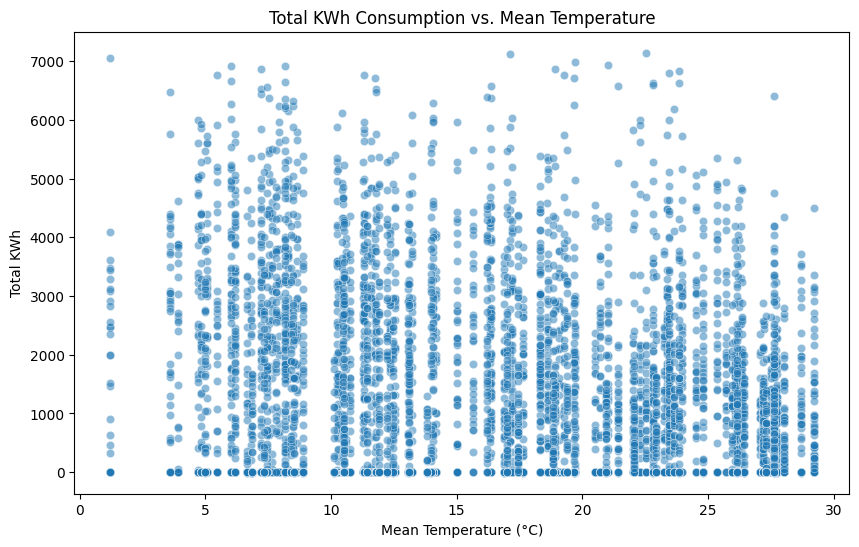

In [20]:
# Scatter plot: Mean Temperature vs. Total KWh
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_weather["Mean Temperature (°C)"], y=df_weather["Total KWh"], alpha=0.5)
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Total KWh")
plt.title("Total KWh Consumption vs. Mean Temperature")
plt.show()

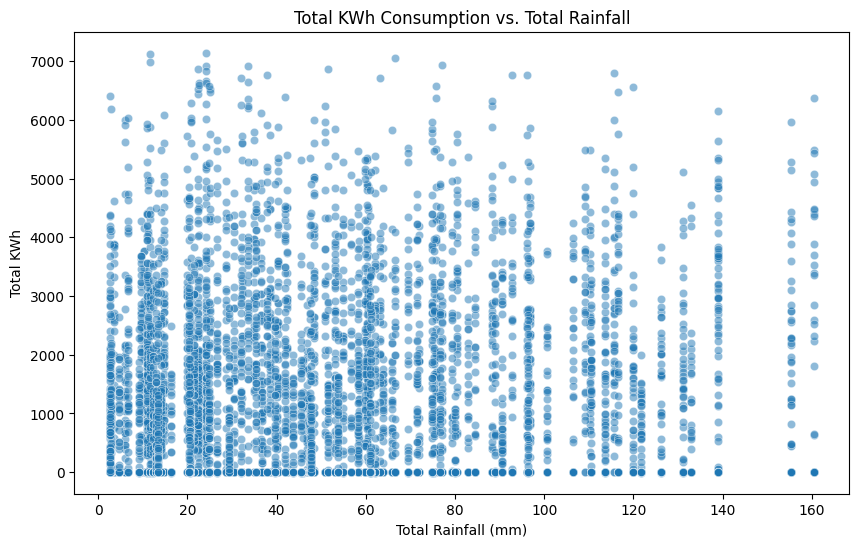

In [21]:
# Scatter plot: Total Rainfall vs. Total KWh
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_weather["Total Rainfall (mm)"], y=df_weather["Total KWh"], alpha=0.5)
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Total KWh")
plt.title("Total KWh Consumption vs. Total Rainfall")
plt.show()

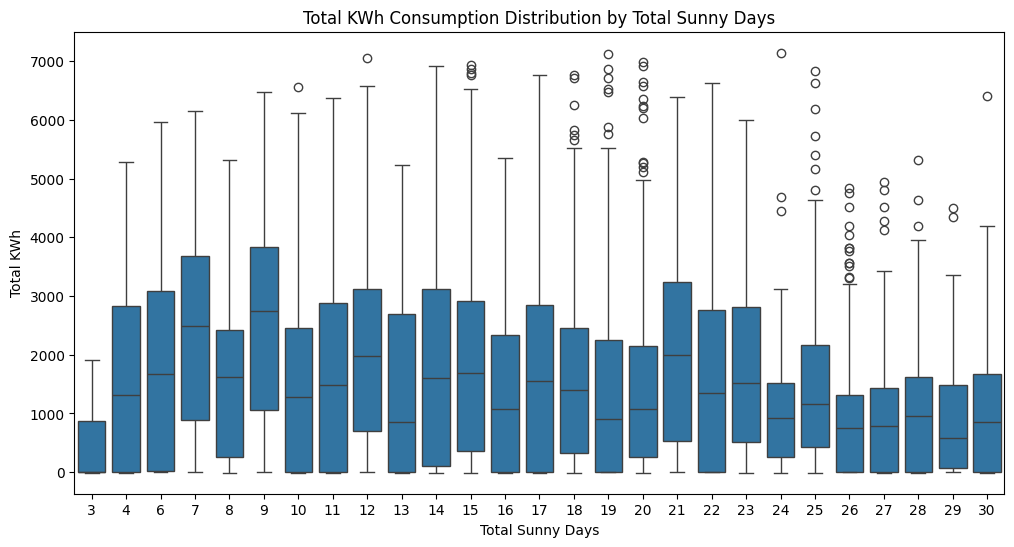

In [22]:
# Boxplot: Total KWh consumption grouped by Total Sunny Days
plt.figure(figsize=(12, 6))
sns.boxplot(x="Total Sunny Days", y="Total KWh", data=df_weather)
plt.xlabel("Total Sunny Days")
plt.ylabel("Total KWh")
plt.title("Total KWh Consumption Distribution by Total Sunny Days")
plt.show()